In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
def llr_obj(X, y, th, th0, lam):
    
    # y(label) data filtering
    #y.where(y != 1, y, 0)
    
    d_number, n_number = X.shape
    
    llr_obj_result = np.sum((np.dot(th.T, X) + th0-y)**2)
    
    return llr_obj_result/n_number + lam*(np.linalg.norm(th)**2)

# returns a (d,1) array for the gradient of llr_obj(X, y, th, th0) with respect to th
# Passed
def d_llr_obj_th(X, y, th, th0, lam):
    #y.where(y != 1, y, 0)
    d_number, n_number = X.shape  
    result =  2 * np.add(np.sum((np.dot(th.T, X) + th0-y) * X, axis = 1)[np.newaxis].T / n_number, 2*lam*th) 
    return result

# returns a (d+1, 1) array for the full gradient as a single vector (which includes both th, th0)
# Passed
def llr_obj_grad(X, y, th, th0, lam):
    d_number, n_number = X.shape
    d_llr_obj_th_result = d_llr_obj_th(X, y, th, th0, lam)  
    result =  2* np.sum(np.dot(th.T, X) + th0 - y) / n_number
    return np.append(d_llr_obj_th_result, result[np.newaxis][np.newaxis], axis=0)

In [3]:
def llr_SGD(data, labels, lam, save, columnOne, columnTwo):
    def llr_min_step_size_fn(i):
       return 2/(i+1)**0.5
    d_number, n_number = data.shape  
    th = np.zeros((d_number,1))
    th0 = np.array([0])
    t = 0
    while t < 1000000:
        t = t+1
        oldth = th
        oldth0 = th0
        random_i = np.random.randint(np.size(data,1))
        oldth_grad = llr_obj_grad(data[:, random_i:random_i+1], labels[:, random_i:random_i+1], th, th0, lam)[0:d_number,:]
        oldth0_grad =  llr_obj_grad(data[:, random_i:random_i+1], labels[:, random_i:random_i+1], th, th0, lam)[-1,0]
        th = th - llr_min_step_size_fn(t) * oldth_grad
        th0 = th0 - llr_min_step_size_fn(t) * oldth0_grad
        if (save == True):
            SaveGraphAnimationImages (th, th0, data, labels, t, 7, 12)
        if np.abs(llr_obj(data, labels, th, th0, lam) - llr_obj(data, labels, oldth, oldth0, lam)) < 0.00001:
            print("Accurate Enough")
            ShowGraph (th, th0, dataset_features, dataset_labels, d_titles, columnOne, columnTwo)
            break
    ShowGraph (th, th0, dataset_features, dataset_labels, d_titles, columnOne, columnTwo)
    return [th, th0]


In [4]:
def DataOrganize(Dataset, XOne_Coluumn_Int, XTwo_Coluumn_Int):
    dataset_features = Dataset[:,0:-1]
    dataset_labels = Dataset[:,-1:]
    
    xOne_Data = dataset_features[:, XOne_Coluumn_Int:XOne_Coluumn_Int+1]
    dataset_labels = dataset_features[:, XTwo_Coluumn_Int:XTwo_Coluumn_Int+1]    
    
    return xOne_Data.T, dataset_labels.T


def SaveGraphAnimationImages (Result_th, Result_thZero, X, y, iteration, colone, coltwo):
    xOne_Data = X
    xTwo_Data = y
    
    xOne = np.linspace(-1000,3500)
    xTwo = xOne*Result_th[0,0]+ Result_thZero[0]
    
    plt.clf()
    
    f = plt.figure()
    xOneLength = np.amax(xOne_Data) - np.amin(xOne_Data)+4
    xTwoLength = np.amax(xTwo_Data) - np.amin(xTwo_Data)+4   
    xOneLRatio = xOneLength/(xOneLength + xTwoLength)
    xTwoLRatio = xTwoLength/(xOneLength + xTwoLength)
    plotSizeMult = 18
    ##f.set_figwidth(xOneLRatio * plotSizeMult)
    ##f.set_figheight(xTwoLRatio * plotSizeMult)
    #Size of Plot_End

    plt.axis([np.amin(xOne_Data)-2, np.amax(xOne_Data)+2, np.amin(xTwo_Data)-2, np.amax(xTwo_Data)+2])
    plt.xlabel(d_titles[colone])
    plt.ylabel(d_titles[coltwo])
    plt.plot(xOne_Data, xTwo_Data, 'bo', markersize=2.5)
    plt.plot(xOne, xTwo, 'r')
    plt.axis([np.min(xOne_Data)-2, np.max(xOne_Data)+2, np.min(xTwo_Data)-2, np.max(xTwo_Data)+2])
    plt.savefig("E:\_Github\ML_LLCandSGD\images\lcResult"+ str(iteration) +'.png')
    
    
def ShowGraph (Result_th, Result_thZero, X, y, d_titles, colone, coltwo):
    
    xOne_Data = X
    xTwo_Data = y
    
    xOne = np.linspace(-1000,3500)
    xTwo = xOne*Result_th[0,0]+ Result_thZero[0]
    
    plt.clf()
    
    f = plt.figure()
    xOneLength = np.amax(xOne_Data) - np.amin(xOne_Data)+4
    xTwoLength = np.amax(xTwo_Data) - np.amin(xTwo_Data)+4   
    xOneLRatio = xOneLength/(xOneLength + xTwoLength)
    xTwoLRatio = xTwoLength/(xOneLength + xTwoLength)
    plotSizeMult = 18
    ##f.set_figwidth(xOneLRatio * plotSizeMult)
    ##f.set_figheight(xTwoLRatio * plotSizeMult)
    #Size of Plot_End

    plt.axis([np.amin(xOne_Data)-2, np.amax(xOne_Data)+2, np.amin(xTwo_Data)-2, np.amax(xTwo_Data)+2])
    plt.xlabel(d_titles[colone])
    plt.ylabel(d_titles[coltwo])
    plt.plot(xOne_Data, xTwo_Data, 'bo', markersize=2.5)
    plt.plot(xOne, xTwo, 'r')
    plt.axis([np.min(xOne_Data)-2, np.max(xOne_Data)+2, np.min(xTwo_Data)-2, np.max(xTwo_Data)+2])



C:\Users\Taeyong\anaconda3\envs\lcperceptron\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18076\1978940076.py:8: RuntimeWarning: overflow encountered in square
  llr_obj_result = np.sum((np.dot(th.T, X) + th0-y)**2)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18076\2827884760.py:19: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(llr_obj(data, labels, th, th0, lam) - llr_obj(data, labels, oldth, oldth0, lam)) < 0.00001:


Accurate Enough
[array([[0.982422]]), array([19.00444268])]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

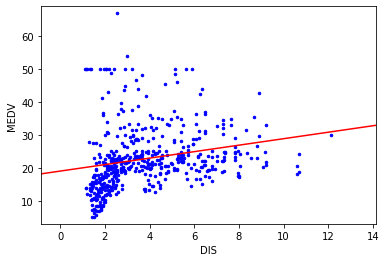

In [5]:
with open('E:\\_Github\\ML_LLCandSGD\\RealEstateDataSetBoston.csv', newline = '', encoding="utf-8-sig") as file:
    reader = csv.reader(file,
                        quoting = csv.QUOTE_ALL,
                        delimiter = ' ')
     
    # storing all the rows in an output list
    output = []
    for row in reader:
        output.append(row[:][0].split(","))

d_titles = np.asarray(output[0])
dataset = np.asarray(output[1:]).astype(float)

#Choose two Columns of csv
columnOne = 7
columnTwo = 13

dataset_features, dataset_labels = DataOrganize(dataset, columnOne, columnTwo)

Result_th_th0 = llr_SGD(dataset_features, dataset_labels, 0.0001, False, columnOne, columnTwo)

print(Result_th_th0)